In [1]:
import numpy as np
from numpy import isfinite
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Продолжим обработку данных с Твиттера. 


In [3]:
PATH_TO_FILE = '/content/drive/MyDrive/full_words_prep.pkl'

In [4]:
df = pd.read_pickle(PATH_TO_FILE)
df.head(5)

,id,tweet,label,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,31963,studiolife aislife requires passion dedication...,NaN,"[studiolife, aislife, requires, passion, dedic...","[studiolife, aislife, requires, passion, dedic...","[studiolif, aislif, requir, passion, dedic, wi...","[studiolife, aislife, require, passion, dedica..."
1,31964,white supremacists want everyone to see the ne...,NaN,"[white, supremacists, want, everyone, to, see,...","[white, supremacists, want, everyone, see, new...","[white, supremacist, want, everyon, to, see, t...","[white, supremacists, want, everyone, to, see,..."
2,31965,safe ways to heal your acne altwaystoheal heal...,NaN,"[safe, ways, to, heal, your, acne, altwaystohe...","[safe, ways, heal, acne, altwaystoheal, health...","[safe, way, to, heal, your, acn, altwaystoh, h...","[safe, ways, to, heal, your, acne, altwaystohe..."
3,31966,is the hp and the cursed child book up for res...,NaN,"[is, the, hp, and, the, cursed, child, book, u...","[hp, cursed, child, book, reservations, alread...","[is, the, hp, and, the, curs, child, book, up,...","[be, the, hp, and, the, curse, child, book, up..."
4,31967,rd bihday to my amazing hilarious nephew eli a...,NaN,"[rd, bihday, to, my, amazing, hilarious, nephe...","[rd, bihday, amazing, hilarious, nephew, eli, ...","[rd, bihday, to, my, amaz, hilari, nephew, eli...","[rd, bihday, to, my, amaze, hilarious, nephew,..."


In [5]:
df['label'].value_counts()

0.0    29720
1.0     2242
Name: label, dtype: int64

In [6]:
np.isnan(df['label']).sum()

17197

In [7]:
df['label'] = df['label'].apply(lambda y: 0 if np.isnan(y) else y)

In [8]:
df.head()

,id,tweet,label,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,31963,studiolife aislife requires passion dedication...,0.0,"[studiolife, aislife, requires, passion, dedic...","[studiolife, aislife, requires, passion, dedic...","[studiolif, aislif, requir, passion, dedic, wi...","[studiolife, aislife, require, passion, dedica..."
1,31964,white supremacists want everyone to see the ne...,0.0,"[white, supremacists, want, everyone, to, see,...","[white, supremacists, want, everyone, see, new...","[white, supremacist, want, everyon, to, see, t...","[white, supremacists, want, everyone, to, see,..."
2,31965,safe ways to heal your acne altwaystoheal heal...,0.0,"[safe, ways, to, heal, your, acne, altwaystohe...","[safe, ways, heal, acne, altwaystoheal, health...","[safe, way, to, heal, your, acn, altwaystoh, h...","[safe, ways, to, heal, your, acne, altwaystohe..."
3,31966,is the hp and the cursed child book up for res...,0.0,"[is, the, hp, and, the, cursed, child, book, u...","[hp, cursed, child, book, reservations, alread...","[is, the, hp, and, the, curs, child, book, up,...","[be, the, hp, and, the, curse, child, book, up..."
4,31967,rd bihday to my amazing hilarious nephew eli a...,0.0,"[rd, bihday, to, my, amazing, hilarious, nephe...","[rd, bihday, amazing, hilarious, nephew, eli, ...","[rd, bihday, to, my, amaz, hilari, nephew, eli...","[rd, bihday, to, my, amaze, hilarious, nephew,..."


In [9]:
def concat_list(series: pd.Series) -> np.array:

    vector = np.vectorize(' '.join) # init resub series vector
    result = vector(series) # resub series

    return result

In [10]:
tweet_stemmed = concat_list(df['tweet_stemmed'])
tweet_stemmed

array(['studiolif aislif requir passion dedic willpow to find newmateri',
       'white supremacist want everyon to see the new bird movi and here whi',
       'safe way to heal your acn altwaystoh healthi heal', ...,
       'listen to sad song on monday morn otw to work is sad',
       'sikh templ vandalis in in calgari wso condemn act',
       'thank you for you follow'], dtype='<U148')

In [11]:
tweet_lemmatized = concat_list(df['tweet_lemmatized'])
tweet_lemmatized

array(['studiolife aislife require passion dedication willpower to find newmaterials',
       'white supremacists want everyone to see the new bird movie and here why',
       'safe ways to heal your acne altwaystoheal healthy heal', ...,
       'listen to sad songs on monday morning otw to work be sad',
       'sikh temple vandalise in in calgary wso condemn act',
       'thank you for you follow'], dtype='<U154')

1. Создайте мешок слов с помощью sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.  
- Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.  
- Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.  
- Исключим стоп-слова с помощью stop_words='english'.   
- Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью CountVectorizer.get_feature_names().


In [12]:
"""
init CountVectorizer
"""
count_vectorizer = text.CountVectorizer(
    max_df=0.9, 
    max_features=1000, 
    stop_words='english'
)
count_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=1000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [13]:
"""
vectorize to stemmed
"""
bow_stemmed_CV = count_vectorizer.fit_transform(tweet_stemmed)

X_train_CV_stem = pd.DataFrame(
    bow_stemmed_CV.toarray(), 
    columns=count_vectorizer.get_feature_names()
)
X_train_CV_stem

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,add,adventur,affirm,afternoon,age,ago,agre,ahead,aist,album,aliv,allahsoil,allow,alon,alreadi,altwaystoh,alway,amaz,america,american,amp,angel,anger,angri,ani,anim,anniversari,announc,anoth,answer,...,wet,whatev,whi,white,wife,wild,win,wine,winner,wish,woh,woman,women,won,wonder,word,work,workout,world,worri,worst,wow,write,wrong,wtf,xx,xxx,ya,yay,ye,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
"""
vectorize to lemmatized
"""
bow_lemmatized_CV = count_vectorizer.fit_transform(tweet_lemmatized)

X_train_CV_lem = pd.DataFrame(
    bow_lemmatized_CV.toarray(),
    columns=count_vectorizer.get_feature_names()
)
X_train_CV_lem

,able,absolutely,accept,account,act,action,actor,actually,adapt,add,adventure,affirmation,affirmations,afternoon,age,ago,agree,ahead,aist,album,alive,allahsoil,alligator,allow,altwaystoheal,amaze,america,american,americans,amp,anger,angry,animals,anniversary,announce,answer,anxiety,anymore,app,apple,...,wife,wild,win,wine,winner,wisdom,wish,woh,woman,women,wonder,wonderful,word,work,workout,world,worry,worse,worst,wow,write,wrong,wtf,xx,xxx,ya,yay,yeah,year,years,yes,yesterday,yo,yoga,york,young,youtube,yr,yrs,yummy
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


2. Создайте мешок слов с помощью sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.  
- Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.  
- Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.  
- Исключим стоп-слова с помощью stop_words='english'.  
- Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью TfidfVectorizer.get_feature_names().  


In [15]:
"""
init TfidfVectorizer
"""
tfidf_vectorizer = text.TfidfVectorizer(
    max_df=0.9,
    max_features=1000, 
    stop_words='english'
)
tfidf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=1000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [16]:
"""
vectorize to stemmed
"""
bow_stemmed_tfidf = tfidf_vectorizer.fit_transform(tweet_stemmed)

X_train_tfidf_stem = pd.DataFrame(
    bow_stemmed_tfidf.toarray(), 
    columns=tfidf_vectorizer.get_feature_names()
)
X_train_tfidf_stem

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,add,adventur,affirm,afternoon,age,ago,agre,ahead,aist,album,aliv,allahsoil,allow,alon,alreadi,altwaystoh,alway,amaz,america,american,amp,angel,anger,angri,ani,anim,anniversari,announc,anoth,answer,...,wet,whatev,whi,white,wife,wild,win,wine,winner,wish,woh,woman,women,won,wonder,word,work,workout,world,worri,worst,wow,write,wrong,wtf,xx,xxx,ya,yay,ye,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.344567,0.38839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.342733,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.445736,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.432506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.443232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.294961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [17]:
"""
vectorize to lemmatized
"""
bow_lemmatized_tfidf = tfidf_vectorizer.fit_transform(tweet_lemmatized)

X_train_tfidf_lem = pd.DataFrame(
    bow_lemmatized_tfidf.toarray(),
    columns=tfidf_vectorizer.get_feature_names()
)
X_train_tfidf_lem

,able,absolutely,accept,account,act,action,actor,actually,adapt,add,adventure,affirmation,affirmations,afternoon,age,ago,agree,ahead,aist,album,alive,allahsoil,alligator,allow,altwaystoheal,amaze,america,american,americans,amp,anger,angry,animals,anniversary,announce,answer,anxiety,anymore,app,apple,...,wife,wild,win,wine,winner,wisdom,wish,woh,woman,women,wonder,wonderful,word,work,workout,world,worry,worse,worst,wow,write,wrong,wtf,xx,xxx,ya,yay,yeah,year,years,yes,yesterday,yo,yoga,york,young,youtube,yr,yrs,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.325672,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.482638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.442649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


3. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте таблицу метод векторизации и скор который вы получили (в методах векторизации по изменяйте параметры что бы добиться лучшего скора) обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на качество сделайте выводы

 Подготовка данных

In [18]:
"""
corpus in DF
"""

corpus = open('/content/drive/MyDrive/corpus').read()

labels, texts = [], []

for i, line in enumerate(corpus.split('\n')):
    content = line.split()
    labels.append(content[0])
    texts.append(' '.join(content[1:]))
    
corpusDF = pd.DataFrame()
corpusDF['text'] = texts
corpusDF['label'] = labels
corpusDF['label'] = corpusDF['label'].map({'__label__2': 2, '__label__1': 1})
corpusDF.head()

,text,label
0,Stuning even for the non-gamer: This sound tra...,2
1,The best soundtrack ever to anything.: I'm rea...,2
2,Amazing!: This soundtrack is my favorite music...,2
3,Excellent Soundtrack: I truly like this soundt...,2
4,"Remember, Pull Your Jaw Off The Floor After He...",2


In [19]:
"""
Split on X & y
"""
X_corpus, y_corpus = corpusDF['text'], corpusDF['label']

In [20]:
OBJ = 30000

X_train_stem = tweet_stemmed[:OBJ]
X_train_lem = tweet_lemmatized[:OBJ]

y_train = df['label'][:OBJ]

Тестирование

In [21]:
results = pd.DataFrame(columns=['method']).set_index('method')

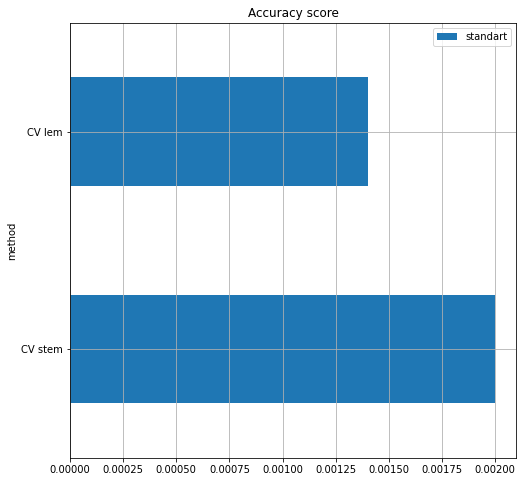

,standart
method,
CV stem,0.0020
CV lem,0.0014


In [22]:
for key_vac, val_vec in {
    'CV': text.CountVectorizer(max_df=0.9, max_features=1000, stop_words='english')
}.items():
    
    for key_tweet, val_tweet in {
        'stem': X_train_stem, 
        'lem': X_train_lem
    }.items():
        
        X_train = val_vec.fit_transform(val_tweet)
        X_test = val_vec.transform(X_corpus)

        classifier = LogisticRegression()
        classifier.fit(X_train, y_train)
        
        y_test_pred = classifier.predict(X_test)
        
        results.loc[f'{key_vac} {key_tweet}', 'standart'] = accuracy_score(y_corpus, y_test_pred)

results.plot(kind='barh', grid=True, title='Accuracy score', figsize=(8, 8))
plt.show()

results

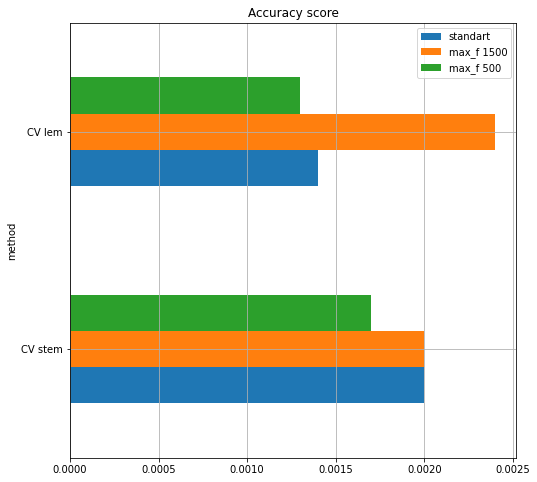

,standart,max_f 1500,max_f 500
method,,,
CV stem,0.0020,0.0020,0.0017
CV lem,0.0014,0.0024,0.0013


In [23]:
for MAX_FEATURES in (1500, 500):
    
    for key_vac, val_vec in {
        'CV': text.CountVectorizer(max_df=0.9, max_features=MAX_FEATURES, stop_words='english')
    }.items():

        for key_tweet, val_tweet in {
            'stem': X_train_stem, 
            'lem': X_train_lem
        }.items():

            X_train = val_vec.fit_transform(val_tweet)
            X_test = val_vec.transform(X_corpus)

            classifier = LogisticRegression()
            classifier.fit(X_train, y_train)

            y_test_pred = classifier.predict(X_test)

            results.loc[f'{key_vac} {key_tweet}', f'max_f {MAX_FEATURES}'] = accuracy_score(y_corpus, y_test_pred)

results.plot(kind='barh', grid=True, title='Accuracy score', figsize=(8, 8))
plt.show()

results

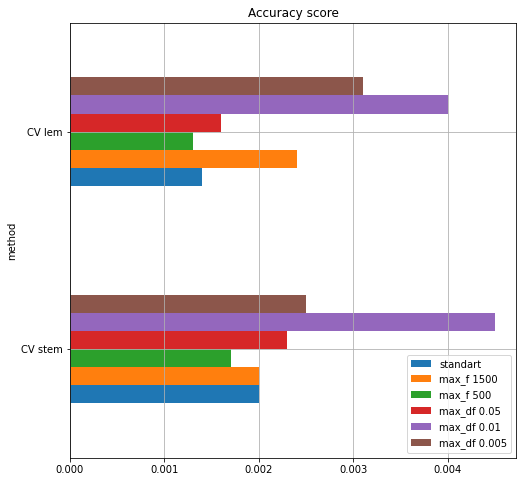

,standart,max_f 1500,max_f 500,max_df 0.05,max_df 0.01,max_df 0.005
method,,,,,,
CV stem,0.0020,0.0020,0.0017,0.0023,0.0045,0.0025
CV lem,0.0014,0.0024,0.0013,0.0016,0.0040,0.0031


In [24]:
for MAX_DF in (0.05, 0.01, 0.005):
    
    for key_vac, val_vec in {
        'CV': text.CountVectorizer(max_df=MAX_DF, max_features=1000, stop_words='english')
    }.items():

        for key_tweet, val_tweet in {
            'stem': X_train_stem, 
            'lem': X_train_lem
        }.items():

            X_train = val_vec.fit_transform(val_tweet)
            X_test = val_vec.transform(X_corpus)

            classifier = LogisticRegression()
            classifier.fit(X_train, y_train)

            y_test_pred = classifier.predict(X_test)

            results.loc[f'{key_vac} {key_tweet}', f'max_df {MAX_DF}'] = accuracy_score(y_corpus, y_test_pred)

results.plot(kind='barh', grid=True, title='Accuracy score', figsize=(8, 8))
plt.show()

results

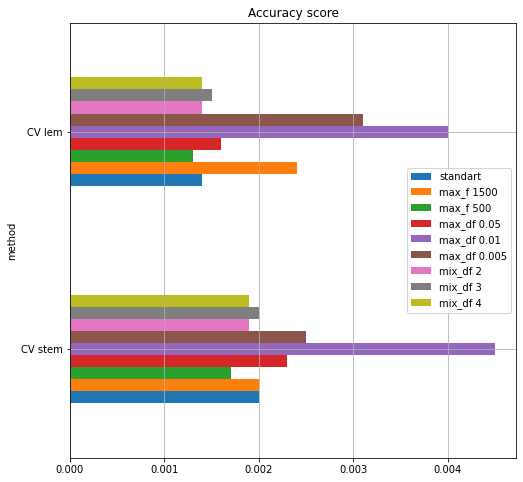

,standart,max_f 1500,max_f 500,max_df 0.05,max_df 0.01,max_df 0.005,mix_df 2,mix_df 3,mix_df 4
method,,,,,,,,,
CV stem,0.0020,0.0020,0.0017,0.0023,0.0045,0.0025,0.0019,0.0020,0.0019
CV lem,0.0014,0.0024,0.0013,0.0016,0.0040,0.0031,0.0014,0.0015,0.0014


In [25]:
for MIN_DF in [2, 3, 4]:
    
    for key_vac, val_vec in {
        'CV': text.CountVectorizer(max_df=0.9, min_df=MIN_DF, max_features=1000, stop_words='english')
    }.items():

        for key_tweet, val_tweet in {
            'stem': X_train_stem, 
            'lem': X_train_lem
        }.items():

            X_train = val_vec.fit_transform(val_tweet)
            X_test = val_vec.transform(X_corpus)

            classifier = LogisticRegression()
            classifier.fit(X_train, y_train)

            y_test_pred = classifier.predict(X_test)

            results.loc[f'{key_vac} {key_tweet}', f'mix_df {MIN_DF}'] = accuracy_score(y_corpus, y_test_pred)

results.plot(kind='barh', grid=True, title='Accuracy score', figsize=(8, 8))
plt.show()

results
